
# **1-Planteamiento**
# **Sí quisieramos emprender en el negocio inmobiliario, ¿qué datos necesitariamos para comenzar con el pie derecho?**

Se dice que una de las capitales del mundo es la ciudad de Nueva York, donde grandes emprendimientos han llegado a la cima de sus éxitos. AirBnB es una de las apps que más se escucha a nivel mundial, usualmente utilizada para encontrar alojamientos cuando de turismo se trata y no esta demás decir que Nueva York es una de las ciudades más visitadas a nivel mundial todos los años, sin importar la temporada.


Cuando iniciamos un negocio inmobiliario uno de los procesos principales para determinar nuestro modelo de negocio es el análisis de los datos, con el objetivo de encontrar datos como: la localización ideal para la construcción o compra de un inmueble, la ubicación, tipos de alquileres, disponibilidad y precios.

 En esta oportunidad analizaremos un dataset que contiene datos y variables de interes. El cual nos permitirá determinar de manera objetiva qué tipos de alojamientos tienen mayor oferta en el mercado segun su ubicación entre otras variables, que nos dará mejor visibilidad para la toma de una acertada desición respecto a optar por la inversión adecuada.






# **2- Desarrollo**:

En pro de encontrar la localización ideal en base a las variables mencionadas, requerimos determinar cuales de ellas tienen una relacion con el precio, como por ejemplo: ¿existe alguna relación del precio en función a los dias disponibles al año?, ¿hay alguna relación del precio según la localidad?, ¿Cuales localidades tienen mayor oferta?, ¿Cuales son los tipos de alquileres con mayor variedad de precios?.

## (CÓDIGO)


In [ ]:
#Importacion de librerias
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NYC-Airbnb-2023-data.csv',delimiter=',',header=0)
d1 = datos
print(d1)

                                                     id  \
0                                                  2595   
1                                                  5121   
2                                                  5203   
3                                                  5178   
4     5136,"Large Sunny Brooklyn Duplex, Patio + Gar...   
...                                                 ...   
2451                                            3677436   
2452                                            3749971   
2453                                            3677769   
2454                                            3752035   
2455                                            3511778   

                                    name     host_id  host_name  \
0                  Skylit Midtown Castle      2845.0   Jennifer   
1                        BlissArtsSpace!      7356.0      Garon   
2     Cozy Clean Guest Room - Family Apt      7490.0  MaryEllen   
3       Large Furnished

In [ ]:
#Se rellenan los datos "NaN" sustituyendolos por el promedio de la columna
d1.fillna(d1.mean(), inplace=True)
print(d1)


                                                     id  \
0                                                  2595   
1                                                  5121   
2                                                  5203   
3                                                  5178   
4     5136,"Large Sunny Brooklyn Duplex, Patio + Gar...   
...                                                 ...   
2451                                            3677436   
2452                                            3749971   
2453                                            3677769   
2454                                            3752035   
2455                                            3511778   

                                    name       host_id  host_name  \
0                  Skylit Midtown Castle  2.845000e+03   Jennifer   
1                        BlissArtsSpace!  7.356000e+03      Garon   
2     Cozy Clean Guest Room - Family Apt  7.490000e+03  MaryEllen   
3       Large F

<ipython-input-9-f4fa8daa1219>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  d1.fillna(d1.mean(), inplace=True)


In [ ]:
d2 = d1.fillna(d1.mode().iloc[0])
d3 = d2.round(4)
print(d3)

                                                     id  \
0                                                  2595   
1                                                  5121   
2                                                  5203   
3                                                  5178   
4     5136,"Large Sunny Brooklyn Duplex, Patio + Gar...   
...                                                 ...   
2451                                            3677436   
2452                                            3749971   
2453                                            3677769   
2454                                            3752035   
2455                                            3511778   

                                    name       host_id            host_name  \
0                  Skylit Midtown Castle  2.845000e+03             Jennifer   
1                        BlissArtsSpace!  7.356000e+03                Garon   
2     Cozy Clean Guest Room - Family Apt  7.490000e+03

## 2.1 - ESTRUCTURA DE DATASET


Estructura del dataset luego de limpiar la gran mayoria de sus datos, con el objetivo de obtener datos ordenados.

In [ ]:
d3.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2.845000e+03,Jennifer,Manhattan,Midtown,40.7536,-73.9856,Entire home/apt,150.0000,30.0000,49.000,2022-06-21,0.3000,3.0000,314.0000,1.000,NaN
1,5121,BlissArtsSpace!,7.356000e+03,Garon,Brooklyn,Bedford-Stuyvesant,40.6854,-73.9551,Private room,60.0000,30.0000,50.000,2019-12-02,0.3000,2.0000,365.0000,0.000,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7.490000e+03,MaryEllen,Manhattan,Upper West Side,40.8038,-73.9675,Private room,75.0000,2.0000,118.000,2017-07-21,0.7200,1.0000,0.0000,0.000,NaN
3,5178,Large Furnished Room Near B'way,8.967000e+03,Shunichi,Manhattan,Midtown,40.7646,-73.9832,Private room,68.0000,2.0000,575.000,2023-02-19,3.4100,1.0000,106.0000,52.000,NaN
4,"5136,""Large Sunny Brooklyn Duplex, Patio + Gar...",Loft Suite,5.924846e+06,The Box House Hotel,Manhattan,Williamsburg,40.7298,-73.9591,Entire home/apt,195.4192,24.5735,67.557,2023-01-01,0.6545,2.7079,118.5279,5.852,NaN


## 2.2 - PROMEDIO DE PRECIOS POR TIPO DE ALQUILER:

Según los datos provistos podemos observar que existen varios tipos de alquileres, considerados modelos de negocios:

**Entire home/apt:** Alquiler de propiedad completa sea dpto o casa.

**Hotel room:** Habitaciones de hoteles.

**Shared room:** Habitaciones compartidas.

**Private room:** Habitaciones privadas.



 En este caso la interrogante que tenemos es conocer el promedio de precios para cada uno de ellos. Donde encontramos que:



**Entire home/apt:**    229.88 $

**Hotel room:**      219.00 $

**Shared room:**       188.60 $

**Private room:**     112.08 $




room_type
Entire home/apt    229.88
Hotel room         219.00
Shared room        188.60
Private room       112.08
Name: price, dtype: float64


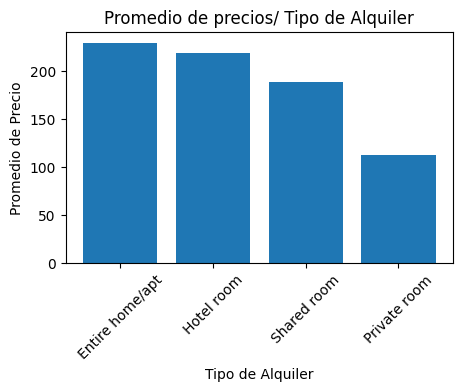

In [36]:
# - Promedio de precios por tipo de alquiler
room_price = d3.groupby('room_type')['price'].mean().round(2)
room_price1 = room_price.sort_values( ascending=False)
x = room_price1.index
y = room_price1.values
fig, ax = plt.subplots(figsize=(5, 3))
ax.bar(x, y, label='Promedio por tipo de Alquiler')


plt.title('Promedio de precios/ Tipo de Alquiler')
plt.xlabel('Tipo de Alquiler')
plt.ylabel('Promedio de Precio')
plt.xticks(rotation=45)

print(room_price1)

## 2.3 - Porcentajes de oferta segun la localidad:

Luego de conocer los precios promedios según el tipo de alquiler, es necesario conocer en qué localidades tienen mayor oferta dichos alquileres, lo que nos permite saber las ubicaciones donde mayor probabilidad de busquedas o interés de alquiler hay. Encontrando que:


***Porcentajes por Localidad***:

Manhattan        54.11 %

Brooklyn         37.83 %

Queens            6.27 %

Bronx             1.30 %

Staten Island     0.49 %

**Podemos notar que tanto en Manhattan como Brooklyn tienen la mayor cantidad de oferta de alquileres, indiferentemente de su tipo.**

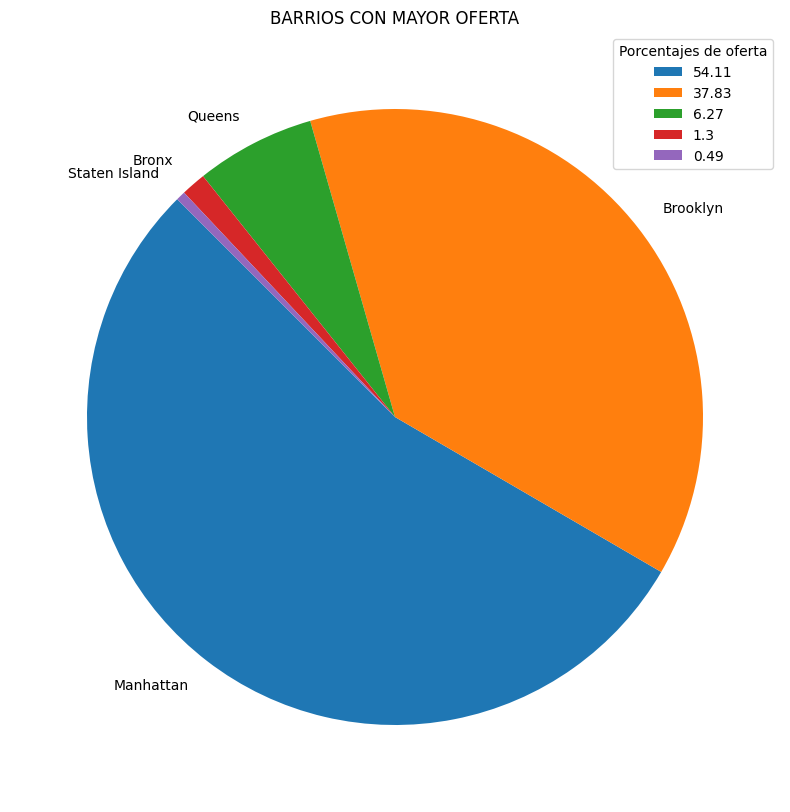

Manhattan        54.11
Brooklyn         37.83
Queens            6.27
Bronx             1.30
Staten Island     0.49
Name: neighbourhood_group, dtype: float64


In [105]:
# - Porcentaje de localidades con mas oferta
# Conteo de barrios totales del DataFrame d1

dist_barrios = d3['neighbourhood_group'].value_counts()

#Porcentajes
avg = d3['neighbourhood_group'].value_counts(normalize=True) * 100

avg1 = avg.round(2)
# Variables
x = avg1.index
y = avg1.values

plt.figure(figsize=(10, 10))
plt.pie(avg1, labels=x, startangle=135)
plt.subplots_adjust(left=0, right=0.85)
plt.gca().set_aspect('equal')

plt.legend(avg1, title='Porcentajes de oferta', bbox_to_anchor=(1, 1), loc='best')
plt.title('BARRIOS CON MAYOR OFERTA')

plt.show()
print(avg1)

## 2.3 - MEDIA DE PRECIOS SEGUN LA LOCALIDAD:

Analizando los siguientes resultados podemos ver que el tipo de alquiler de habitación de hotel ('Hotel room') solo se encuentra en la localidad de Brooklyn, mientras que el alquiler de habitación privada (Private room) y alquier entero (Entire home/apt) tienen mayor oferta en todas las localidades con promedios de precios más altos en este último, en las localidades de Manhattan y Brooklyn.

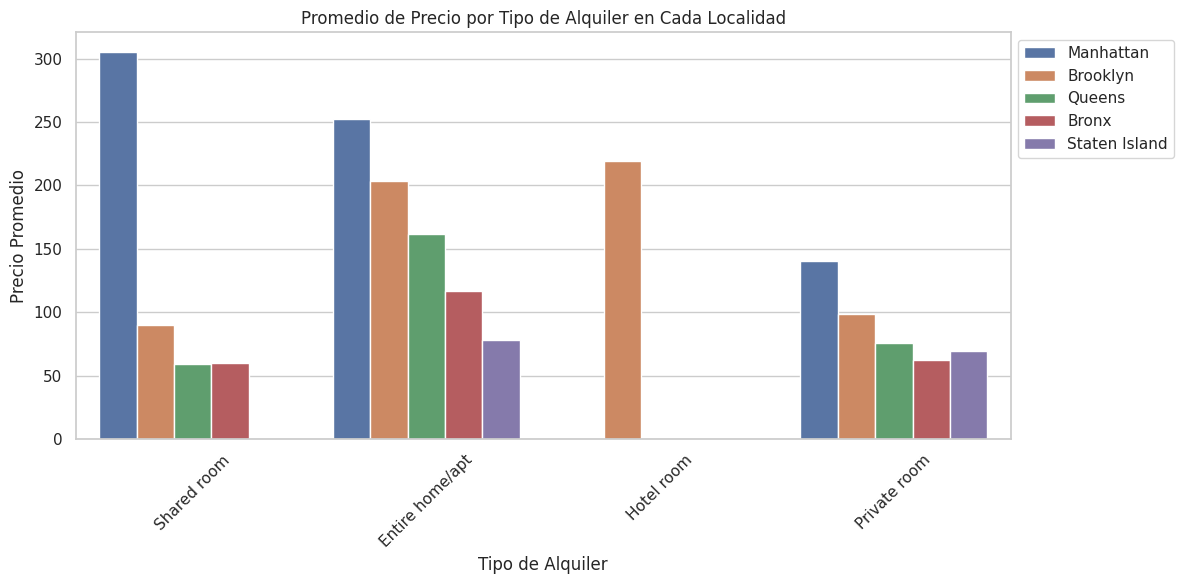

In [114]:
# - Promedio de precios por tipo de alquiler en cada localidad
prom_barrios = d3.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()
prom_barrios1= prom_barrios.sort_values(by='price',ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="room_type", y="price", hue="neighbourhood_group", data=prom_barrios1)


plt.title("Promedio de Precio por Tipo de Alquiler en Cada Localidad")
plt.xlabel("Tipo de Alquiler")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


plt.tight_layout()
plt.show()

## 2.4 - RELACION DEL PRECIO EN FUNCION A LOS DIAS DISPONIBLES:

Una vez identificados los tipos de alquiler con mayor oferta según el gráfico anterior, los cuales son: alquiler Entero y Habitación provada, otra variable en relacion al precio independientemente de su ubicación es la relación del precio en función a los dias disponible, para esto, se traza una linea de tendencia en un gráfico de dispersión que permite ver la relacion del precio en funcion del tiempo.

> Bloc con sangría



Sin embargo, se observa que no hay una relación que señale variabilidad del precio conforme los alquileres dispongan de mayor disponibilidad. Por lo que dicha relación no impactaría en la toma de desiciones.

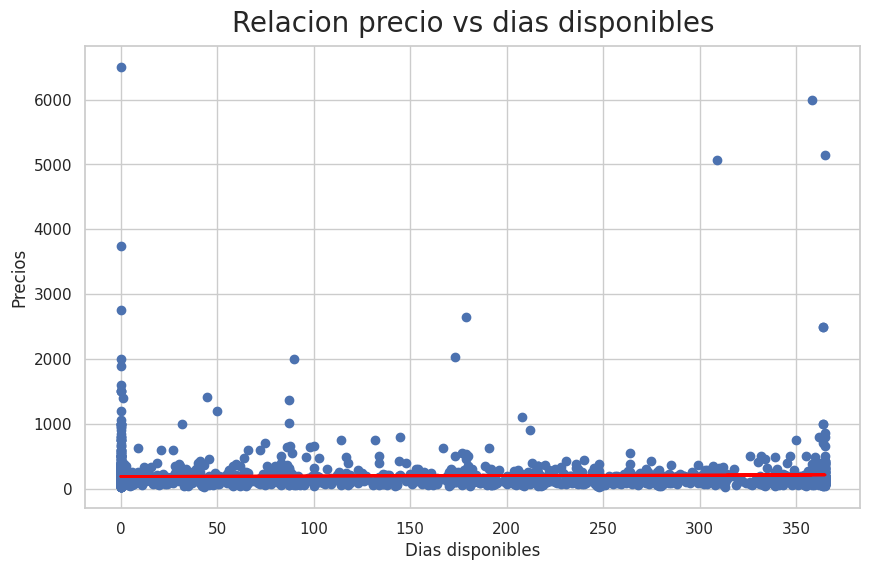

In [116]:
# Linea de tendencia de la relacion de precios vs dias disponibles
most_rent = d3[d3['room_type'].isin(['Entire home/apt', 'Private room'])]

dias = most_rent['availability_365']
precio = most_rent['price']

# Calculo de coeficientes
coefficients = np.polyfit(dias, precio, 1)
b, a = coefficients

#Línea de tendencia
trend_line = b * dias + a

plt.figure(figsize=(10, 6))
plt.scatter(dias, precio)
plt.plot(dias, trend_line, color='red', linewidth=2, label='Línea de Tendencia')

plt.title("Relacion precio vs dias disponibles", fontsize=20, verticalalignment='bottom');
plt.xlabel("Dias disponibles");
plt.ylabel("Precios");

## 2.5 - VARIABILIDAD DE PRECIOS SEGUN LOCALIDAD - ALOJAMIENO ENTERO Y HABITACIÓN ENTERA:

Podemos observar como las localidades de Manhattan y Brooklyn tienen mayor variedad de precios segun los tipos de alojamientos mencionados, los cuales superan los 1000 U$D en ambas localidades.

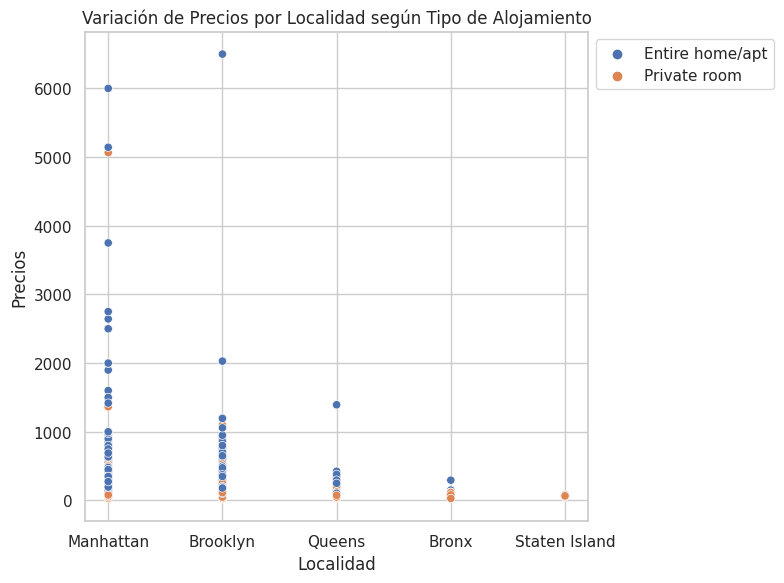

In [119]:
# - Relacion de precios segun localidad (Alojamiento entero, Habitacion privada)
plt.figure(figsize=(8, 6))

sns.scatterplot(data=most_rent, x='neighbourhood_group', y='price', hue = 'room_type')

plt.xlabel('Localidad')
plt.ylabel('Precios')
plt.title('Variación de Precios por Localidad según Tipo de Alojamiento')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


plt.tight_layout()
plt.show()


## 2.6 - RANGO DE PRECIOS SEGUN CADA BARRIO EN LAS LOCALIDADES DE MANHATTAN Y BROOKLYN:

Una vez determinado que las localidades de Manhattan y Brooklyn son aquellas con mayor oferta para los tipos de alojamiento entero y habitación privada, es necesario conocer el rango de precios segun cada barrio para estas localidades seleccionadas, obteniendo los siguientes resultados:

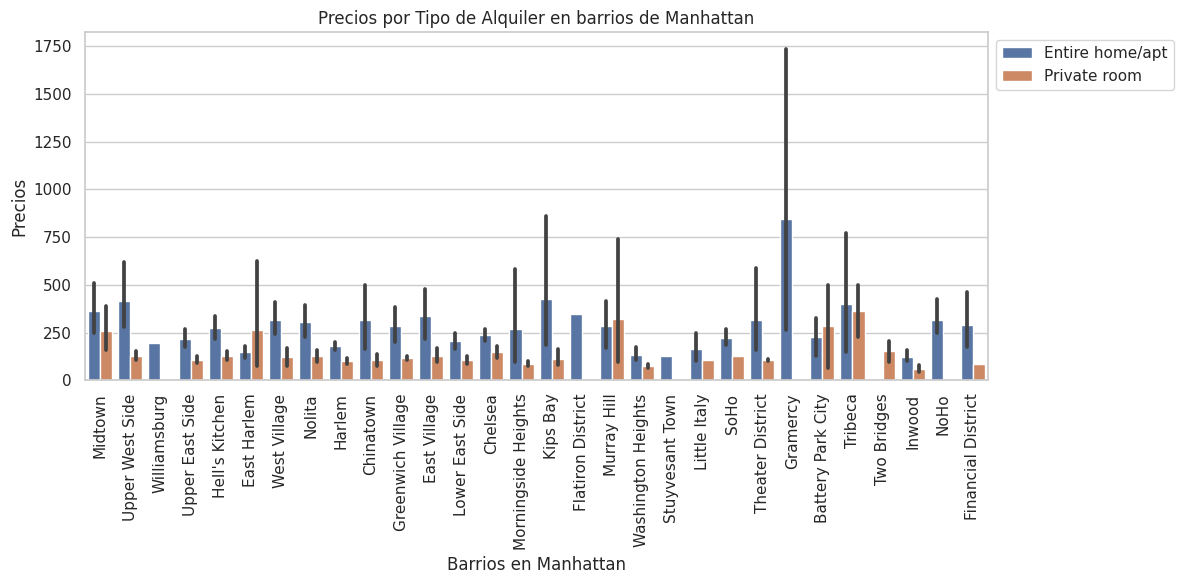

In [123]:
# - Precios por tipo de alquiler en los barrios de las localidades con mayor oferta: MANHATTAN

most_rent_m = most_rent[most_rent['neighbourhood_group'].isin(['Manhattan'])]
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="neighbourhood", y="price", hue="room_type", data=most_rent_m)
most_rent_mi = most_rent_m['neighbourhood'].value_counts()


plt.xlabel('Barrios en Manhattan')
plt.ylabel('Precios')
plt.title('Precios por Tipo de Alquiler en barrios de Manhattan')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


plt.tight_layout()
plt.show()


***Precios por tipo de alquiler en los barrios de Manhattan:***

Dentro de la localidad de Manhattan los barrios con mayor oferta de alquiler mayor igual a 50 ofertas son:


Harlem:                 157

Upper West Side:        103

East Village:            97

Upper East Side:         82

Chelsea:                 55

Hell's Kitchen:          54

East Harlem:             50

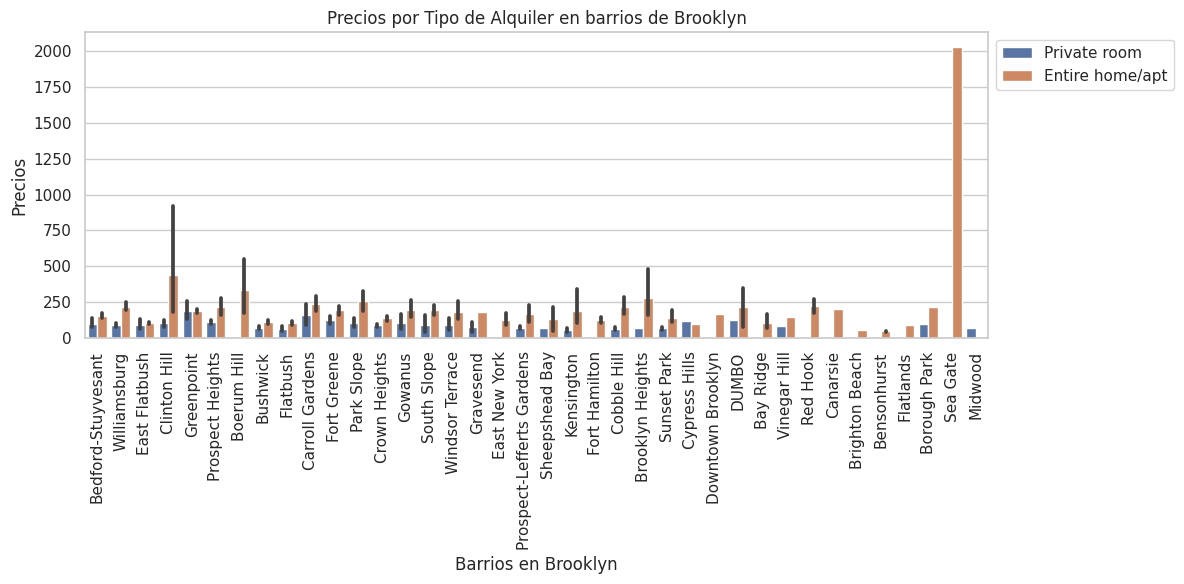

In [124]:
#Relacion de precio por barrio primero en Brooklyn

most_rent_b = most_rent[most_rent['neighbourhood_group'].isin(['Brooklyn'])]
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="neighbourhood", y="price", hue="room_type", data=most_rent_b)
most_rent_bi = most_rent_b['neighbourhood'].value_counts()

plt.xlabel('Barrios en Brooklyn')
plt.ylabel('Precios')
plt.title('Precios por Tipo de Alquiler en barrios de Brooklyn')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


plt.tight_layout()
plt.show()


***Precios por tipo de alquiler en los barrios de Brooklyn:***

Dentro de la localidad de Manhattan los barrios con mayor oferta de alquiler igual o por encima de 50 ofertas son:

Williamsburg:                185

Bedford-Stuyvesant:           155

Greenpoint:                    80

Crown Heights:                 68

Bushwick:                      50

# **3 - Conclusiones**

Dados los insights obtenidos en las visualizaciones,  es posible dar algunas recomendaciones que permitirán tomar la desición del tipo de inversión a optar. En primer lugar:

1 - Las localidades con mayor oferta corresponden a Manhattan y Brooklyn. Donde los barrios con mayor oferta corresponden a:

Manhattan: Harlem, Upper West Side, East Village

Brooklyn: Williamsburg, Bedford-Stuyvesant, Greenpoint.


2- Los alquileres mas ofertados son de tipo : Alojamiento entero y habitación privada. Esto abre la posibilidad de coprar o construir alojamientos enteros que pueden ser segmentados en habitaciones privadas, o multiples inmuebles que pueden ser ofertados para alojamientos enteros.


3 -  Por otro lado, no se encontró relacion entre los dias disponibles al año y su variación en precio, lo que significa que no hay alquileres elevados en función de su disponibilidad. Dando la posibilidad de generar ofertas en relacion a la calidad y locación del alquiler.